In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score 
%matplotlib inline

In [2]:
df = pd.read_csv('HVFHV2019_0.csv')
df

,Unnamed: 0,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag
0,0,HV0003,B02867,2019-02-01 00:05:18,2019-02-01 00:14:57,245,251,NaN
1,1,HV0003,B02879,2019-02-01 00:41:29,2019-02-01 00:49:39,216,197,NaN
2,2,HV0005,B02510,2019-02-01 00:51:34,2019-02-01 01:28:29,261,234,NaN
3,3,HV0005,B02510,2019-02-01 00:03:51,2019-02-01 00:07:16,87,87,NaN
4,4,HV0005,B02510,2019-02-01 00:09:44,2019-02-01 00:39:56,87,198,NaN
5,5,HV0005,B02510,2019-02-01 00:59:55,2019-02-01 01:06:28,198,198,1.0
6,6,HV0005,B02510,2019-02-01 00:12:06,2019-02-01 00:42:13,161,148,NaN
7,7,HV0005,B02510,2019-02-01 00:45:35,2019-02-01 01:14:56,148,21,NaN
8,8,HV0003,B02867,2019-02-01 00:10:48,2019-02-01 00:20:23,226,260,NaN
9,9,HV0003,B02867,2019-02-01 00:32:32,2019-02-01 00:40:25,7,223,NaN


In [3]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])
df['hour']=df['pickup_datetime'].dt.hour

In [4]:
df_lat_long= pd.read_csv('area with long lat.csv')

In [5]:
df_lat_long

,Unnamed: 0,X,Y,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,LAT,LONG
0,0,-8257322.018,4966652.597,1,0.116357,0.000782,Newark Airport,1,EWR,40.689516,-74.176786
1,1,-8218286.728,4957291.835,2,0.433470,0.004866,Jamaica Bay,2,Queens,40.625724,-73.826126
2,2,-8220886.389,4992580.187,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,40.865888,-73.849479
3,3,-8235084.522,4971738.916,4,0.043567,0.000112,Alphabet City,4,Manhattan,40.724152,-73.977023
4,4,-8258785.193,4946241.476,5,0.092146,0.000498,Arden Heights,5,Staten Island,40.550340,-74.189930
5,5,-8245186.937,4953382.090,6,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,40.599062,-74.067774
6,6,-8228902.689,4977165.329,7,0.107417,0.000390,Astoria,7,Queens,40.761085,-73.921491
7,7,-8229093.250,4979740.882,8,0.027591,0.000027,Astoria Park,8,Queens,40.778607,-73.923202
8,8,-8214044.841,4976184.541,9,0.099784,0.000338,Auburndale,9,Queens,40.754411,-73.788020
9,9,-8214450.624,4964980.432,10,0.099839,0.000436,Baisley Park,10,Queens,40.678125,-73.791665


In [6]:
brooklyn=[195,54,40,52,33,65,66,25,106,181,97,34,49,189,190,62,61,188,17,217,256,255,112,80,36,37,225,177,35,77,72,39,222,76,63,228,111,257,85,89,133,227,26,67,14,11,22,21,178,165,71,91,155,149,123,108,55,29,150,210,154]

df_1=[]

for i in range(0,len(df_lat_long)):
    for j in range(0,len(brooklyn)):
        if df_lat_long['LocationID'][i]==brooklyn[j]:
            df_1.append(df_lat_long.loc[i])
df_brooklyn=pd.DataFrame(df_1)

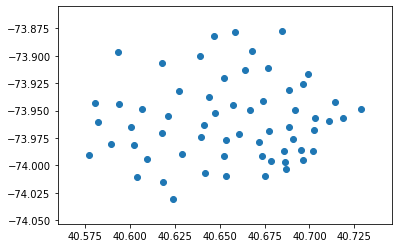

In [7]:
plt.scatter(df_brooklyn['LAT'],df_brooklyn['LONG'])

In [8]:
df_lat_long_123=pd.concat([df_brooklyn['LAT'],df_brooklyn['LONG']],axis=1)

In [9]:
df_lat_long_123

,LAT,LONG
10,40.603978,-74.010616
13,40.623584,-74.030447
16,40.691994,-73.949181
20,40.602049,-73.981301
21,40.609627,-73.994297
24,40.685615,-73.986459
25,40.628612,-73.989560
28,40.582196,-73.960580
32,40.696238,-73.995329
33,40.702559,-73.967699


In [10]:
list_idx=df_brooklyn['LocationID']
list_idx=np.array(list_idx)

list_try=[]
for i in range(0, len(list_idx)):
    a=len(df[(((df.hour)== 7)|((df.hour)== 8)|((df.hour)== 9) )&((df.PULocationID)==list_idx[i])])
    list_try.append(a)
    
#df_lat_long_123['pick_up_time']=list_try

In [224]:
#list_try=pd.DataFrame(list_try)

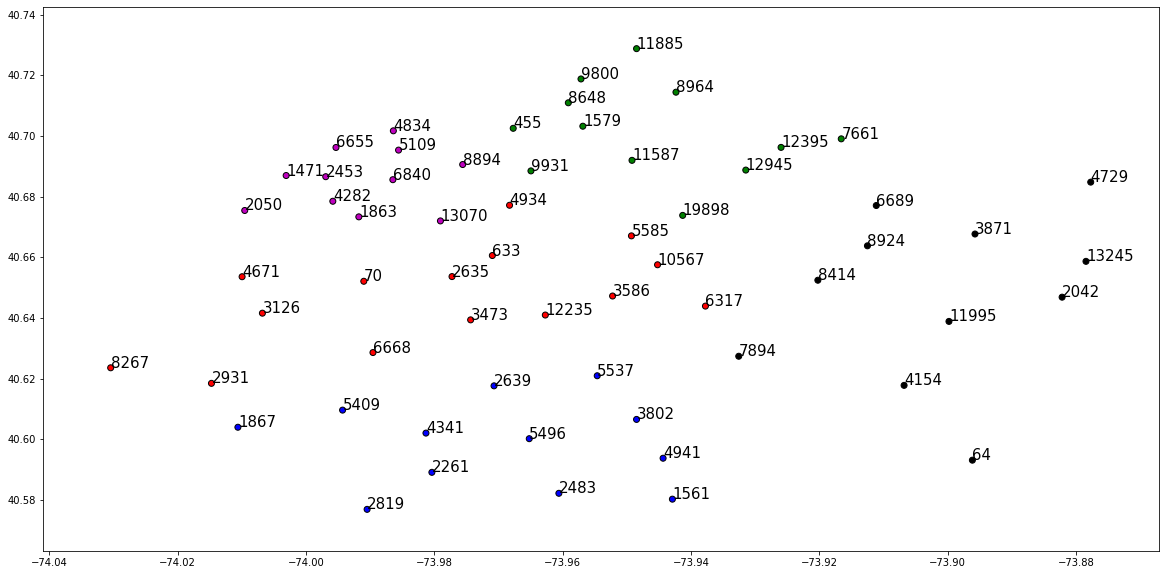

In [11]:
spectral_model_= SpectralClustering(n_clusters =5 ,affinity='nearest_neighbors',assign_labels='discretize',n_neighbors=10) 
labels_nn = spectral_model_.fit_predict(df_lat_long_123) 
x=df_lat_long_123['LONG'].values
y=df_lat_long_123['LAT'].values
fig, ax = plt.subplots(figsize=(20,10))
colmap={1:'r', 2:'g', 3:'b', 4:'k', 5:'m',6:'y',7:'c',8:'thistle', 9:'chocolate',10:'pink',11:'steelblue',12:'gray',13:'olive',14:'silver',15:'rosybrown',16:'salmon',17:'lawngreen',18:'khaki',19:'darkseagreen',20:'aqua'}
colors=map(lambda x: colmap[x+1], labels_nn)
colors1=list(colors)
ax.scatter(x,y, color= colors1, edgecolor='k')

for i, txt in enumerate(list_try):
    ax.annotate(txt, (x[i], y[i]),fontsize=15)

In [12]:
labels_1=labels_nn
df_lat_long_labels=df_lat_long_123
df_lat_long_labels['labels_1']=labels_1
df_lat_long_labels['zone_num']=list_idx
df_lat_long_labels['pick_up_time']=list_try


In [13]:
#df_lat_long_labels[df_lat_long_labels.labels_1==0]

brooklyn_1=df_lat_long_labels[df_lat_long_labels.labels_1==0]
brooklyn_1=brooklyn_1['zone_num'].values

brooklyn_2=df_lat_long_labels[df_lat_long_labels.labels_1==1]
brooklyn_2=brooklyn_2['zone_num'].values

brooklyn_3=df_lat_long_labels[df_lat_long_labels.labels_1==2]
brooklyn_3=brooklyn_3['zone_num'].values

brooklyn_4=df_lat_long_labels[df_lat_long_labels.labels_1==3]
brooklyn_4=brooklyn_4['zone_num'].values

brooklyn_5=df_lat_long_labels[df_lat_long_labels.labels_1==4]
brooklyn_5=brooklyn_5['zone_num'].values


In [14]:
df_lat_long_labels[df_lat_long_labels.labels_1==]

SyntaxError: invalid syntax (<ipython-input-14-bdaa7d5840b7>, line 1)

array([ 17,  34,  36,  37,  49,  61,  80, 112, 217, 225, 255, 256],
      dtype=int64)

In [19]:
df_lat_long

,Unnamed: 0,X,Y,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,LAT,LONG
0,0,-8257322.018,4966652.597,1,0.116357,0.000782,Newark Airport,1,EWR,40.689516,-74.176786
1,1,-8218286.728,4957291.835,2,0.433470,0.004866,Jamaica Bay,2,Queens,40.625724,-73.826126
2,2,-8220886.389,4992580.187,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,40.865888,-73.849479
3,3,-8235084.522,4971738.916,4,0.043567,0.000112,Alphabet City,4,Manhattan,40.724152,-73.977023
4,4,-8258785.193,4946241.476,5,0.092146,0.000498,Arden Heights,5,Staten Island,40.550340,-74.189930
5,5,-8245186.937,4953382.090,6,0.150491,0.000606,Arrochar/Fort Wadsworth,6,Staten Island,40.599062,-74.067774
6,6,-8228902.689,4977165.329,7,0.107417,0.000390,Astoria,7,Queens,40.761085,-73.921491
7,7,-8229093.250,4979740.882,8,0.027591,0.000027,Astoria Park,8,Queens,40.778607,-73.923202
8,8,-8214044.841,4976184.541,9,0.099784,0.000338,Auburndale,9,Queens,40.754411,-73.788020
9,9,-8214450.624,4964980.432,10,0.099839,0.000436,Baisley Park,10,Queens,40.678125,-73.791665


In [15]:
#queens
queens=[145,193,179,8,146,7,223,226,260,207,129,138,70,173,57,93,56,82,83,157,160,196,95,134,96,198,53,253,92,171,252,15,9,16,73,192,135,121,28,131,98,175,64,19,101,191,258,197,130,122,215,205,38,139,203,219,218,10,216,180,124,132,2,30,117,86,201,27,102]

df_1=[]

for i in range(0,len(df_lat_long)):
    for j in range(0,len(queens)):
        if df_lat_long['OBJECTID'][i]==queens[j]:
            df_1.append(df_lat_long.loc[i])
df_queens=pd.DataFrame(df_1)

In [16]:
df_lat_long_123=pd.concat([df_queens['LAT'],df_queens['LONG']],axis=1)

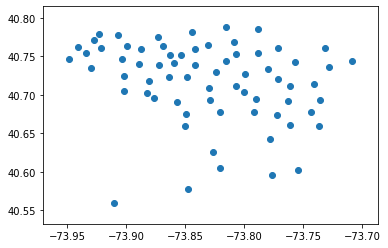

In [17]:
plt.scatter(df_queens['LONG'],df_queens['LAT'])

In [18]:
list_idx=df_queens['OBJECTID']
list_idx=np.array(list_idx)

list_try=[]
for i in range(0, len(list_idx)):
    a=len(df[(((df.hour)== 7)|((df.hour)== 8)|((df.hour)== 9) )&((df.PULocationID)==list_idx[i])])
    list_try.append(a)

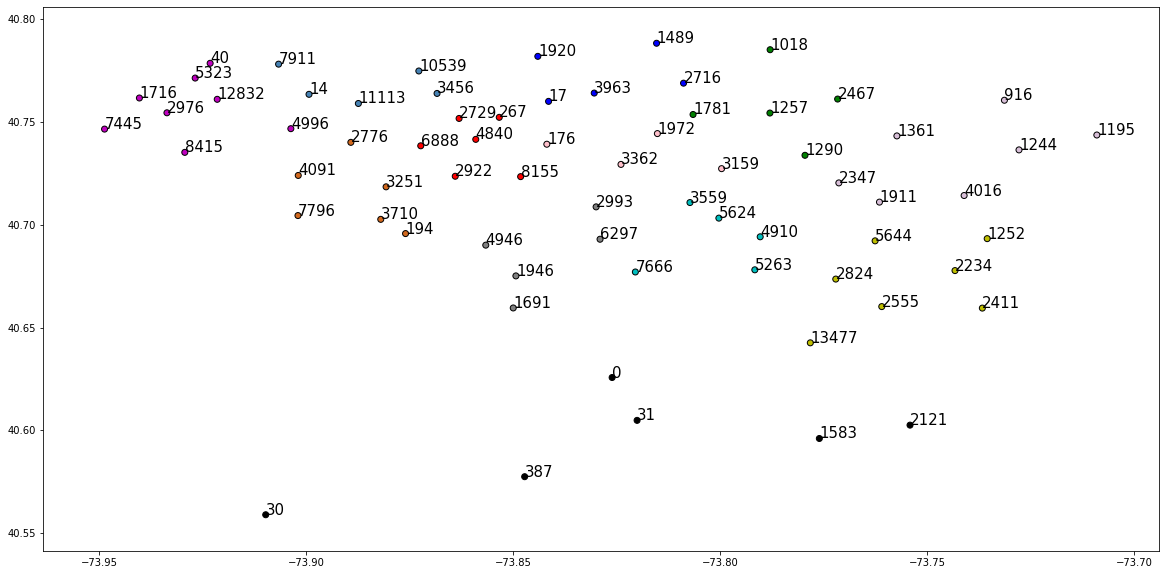

In [19]:
spectral_model_= SpectralClustering(n_clusters =12 ,affinity='nearest_neighbors',assign_labels='discretize',n_neighbors=10) 
labels_nn = spectral_model_.fit_predict(df_lat_long_123) 
x=df_lat_long_123['LONG'].values
y=df_lat_long_123['LAT'].values
fig, ax = plt.subplots(figsize=(20,10))
colmap={1:'r', 2:'g', 3:'b', 4:'k', 5:'m',6:'y',7:'c',8:'thistle', 9:'chocolate',10:'pink',11:'steelblue',12:'gray',13:'olive',14:'silver',15:'rosybrown',16:'salmon',17:'lawngreen',18:'khaki',19:'darkseagreen',20:'aqua'}
colors=map(lambda x: colmap[x+1], labels_nn)
colors1=list(colors)
ax.scatter(x,y, color= colors1, edgecolor='k')

for i, txt in enumerate(list_try):
    ax.annotate(txt, (x[i], y[i]),fontsize=15)

In [20]:
labels_1=labels_nn
df_lat_long_labels=df_lat_long_123
df_lat_long_labels['labels_1']=labels_1
df_lat_long_labels['zone_num']=list_idx
df_lat_long_labels['pick_up_time']=list_try

In [21]:
def printpuzoning (zzz):
    
    
    zoning = ["queens_1",'queens_2',"queens_3","queens_4","queens_5",'queens_6',"queens_7","queens_8","queens_9",'queens_10',"queens_11","queens_12"]
    #zoning = ["brooklyn_1","brooklyn_2","brooklyn_3","brooklyn_4","brooklyn_5", "queens_1","queens_2","queens_3","queens_4","brooklyn_1","brooklyn_2","brooklyn_3","brooklyn_4","brooklyn_5", "queens_1","queens_2","queens_3","queens_4", "brooklyn_1","brooklyn_2","brooklyn_3","brooklyn_4","brooklyn_5", "queens_1","queens_2","queens_3","queens_4","brooklyn_1","brooklyn_2","brooklyn_3","brooklyn_4","brooklyn_5", "queens_1","queens_2","queens_3","queens_4"]
    #list_no = ["2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40"]
    #character = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z","aa","ab", "ac","ad","ae","af" , "ag" ,"ah" ,"ai" ,"aj", "ak" ]
    for zzz in range (0 , (len(zoning))):
    
        print (zoning[zzz]+f'=df_lat_long_labels[df_lat_long_labels.labels_1=={zzz}]'+ '\n')
        print(zoning[zzz]+f'={zoning[zzz]}[\'zone_num\'].values'+ '\n')

printpuzoning(0)

queens_1=df_lat_long_labels[df_lat_long_labels.labels_1==0]

queens_1=queens_1['zone_num'].values

queens_2=df_lat_long_labels[df_lat_long_labels.labels_1==1]

queens_2=queens_2['zone_num'].values

queens_3=df_lat_long_labels[df_lat_long_labels.labels_1==2]

queens_3=queens_3['zone_num'].values

queens_4=df_lat_long_labels[df_lat_long_labels.labels_1==3]

queens_4=queens_4['zone_num'].values

queens_5=df_lat_long_labels[df_lat_long_labels.labels_1==4]

queens_5=queens_5['zone_num'].values

queens_6=df_lat_long_labels[df_lat_long_labels.labels_1==5]

queens_6=queens_6['zone_num'].values

queens_7=df_lat_long_labels[df_lat_long_labels.labels_1==6]

queens_7=queens_7['zone_num'].values

queens_8=df_lat_long_labels[df_lat_long_labels.labels_1==7]

queens_8=queens_8['zone_num'].values

queens_9=df_lat_long_labels[df_lat_long_labels.labels_1==8]

queens_9=queens_9['zone_num'].values

queens_10=df_lat_long_labels[df_lat_long_labels.labels_1==9]

queens_10=queens_10['zone_num'].values

queens_

In [21]:
queens_1=df_lat_long_labels[df_lat_long_labels.labels_1==0]

queens_1=queens_1['zone_num'].values

queens_2=df_lat_long_labels[df_lat_long_labels.labels_1==1]

queens_2=queens_2['zone_num'].values

queens_3=df_lat_long_labels[df_lat_long_labels.labels_1==2]

queens_3=queens_3['zone_num'].values

queens_4=df_lat_long_labels[df_lat_long_labels.labels_1==3]

queens_4=queens_4['zone_num'].values

queens_5=df_lat_long_labels[df_lat_long_labels.labels_1==4]

queens_5=queens_5['zone_num'].values

queens_6=df_lat_long_labels[df_lat_long_labels.labels_1==5]

queens_6=queens_6['zone_num'].values

queens_7=df_lat_long_labels[df_lat_long_labels.labels_1==6]

queens_7=queens_7['zone_num'].values

queens_8=df_lat_long_labels[df_lat_long_labels.labels_1==7]

queens_8=queens_8['zone_num'].values

queens_9=df_lat_long_labels[df_lat_long_labels.labels_1==8]

queens_9=queens_9['zone_num'].values

queens_10=df_lat_long_labels[df_lat_long_labels.labels_1==9]

queens_10=queens_10['zone_num'].values

queens_11=df_lat_long_labels[df_lat_long_labels.labels_1==10]

queens_11=queens_11['zone_num'].values

queens_12=df_lat_long_labels[df_lat_long_labels.labels_1==11]

queens_12=queens_12['zone_num'].values

In [68]:
queens_12

array([ 10,  28, 130, 215, 216], dtype=int64)

In [22]:
#manhattan
manhattan=[153,128,127,243,120,244,116,42,152,166,41,74,194,75,24,151,238,43,239,236,263,262,202,140,141,237,142,143,50,163,48,230,161,162,229,233,170,164,100,186,68,246,90,234,107,137,224,158,249,113,79,4,114,125,211,144,148,232,45,231,209,87,261,13,12,88,105,104,103]

df_1=[]

for i in range(0,len(df_lat_long)):
    for j in range(0,len(manhattan)):
        if df_lat_long['LocationID'][i]==manhattan[j]:
            df_1.append(df_lat_long.loc[i])
df_manhattan=pd.DataFrame(df_1)

In [23]:
df_lat_long_123=pd.concat([df_manhattan['LAT'],df_manhattan['LONG']],axis=1)

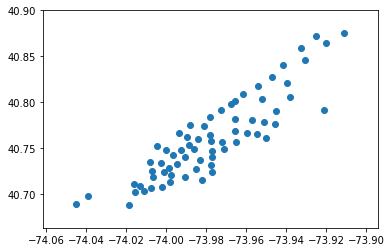

In [24]:
plt.scatter(df_manhattan['LONG'],df_manhattan['LAT'])

In [25]:
list_idx=df_manhattan['LocationID']
list_idx=np.array(list_idx)

list_try=[]
for i in range(0, len(list_idx)):
    a=len(df[(((df.hour)== 7)|((df.hour)== 8)|((df.hour)== 9) )&((df.PULocationID)==list_idx[i])])
    list_try.append(a)

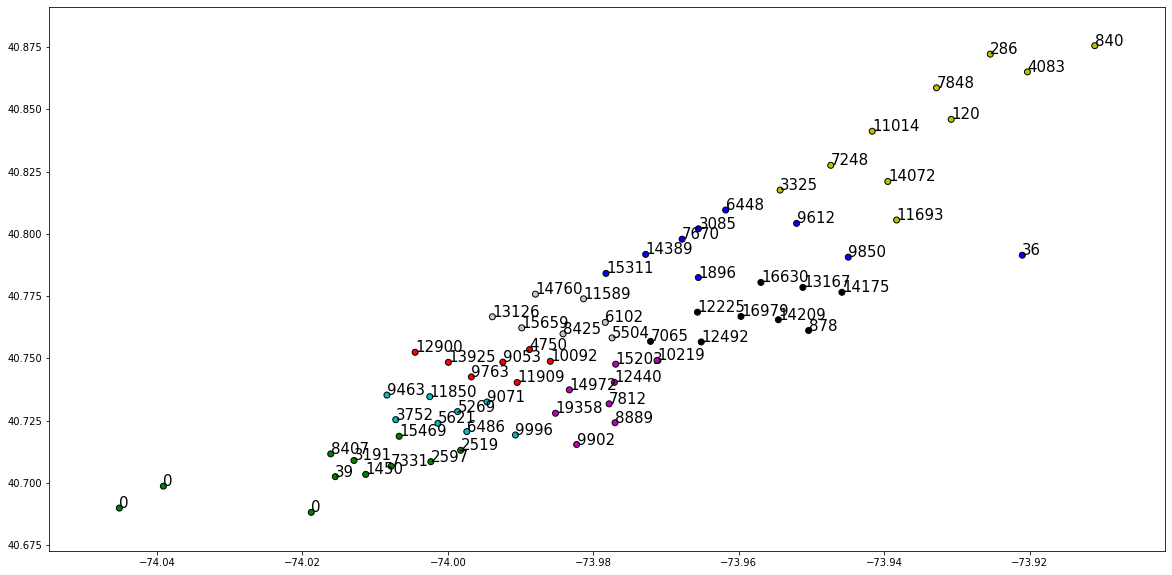

In [26]:
spectral_model_= SpectralClustering(n_clusters =8 ,affinity='nearest_neighbors',assign_labels='discretize',n_neighbors=10) 
labels_nn = spectral_model_.fit_predict(df_lat_long_123) 
x=df_lat_long_123['LONG'].values
y=df_lat_long_123['LAT'].values
fig, ax = plt.subplots(figsize=(20,10))
colmap={1:'r', 2:'g', 3:'b', 4:'k', 5:'m',6:'y',7:'c',8:'thistle', 9:'chocolate',10:'pink',11:'steelblue',12:'gray',13:'olive',14:'silver',15:'rosybrown',16:'salmon',17:'lawngreen',18:'khaki',19:'darkseagreen',20:'aqua'}
colors=map(lambda x: colmap[x+1], labels_nn)
colors1=list(colors)
ax.scatter(x,y, color= colors1, edgecolor='k')

for i, txt in enumerate(list_try):
    ax.annotate(txt, (x[i], y[i]),fontsize=15)

In [27]:
labels_1=labels_nn
df_lat_long_labels=df_lat_long_123
df_lat_long_labels['labels_1']=labels_1
df_lat_long_labels['zone_num']=list_idx
df_lat_long_labels['pick_up_time']=list_try

In [33]:
def printpuzoning (zzz):
    
    
    zoning = ["manhattan_1",'manhattan_2',"manhattan_3","manhattan_4",'manhattan_5',"manhattan_6","manhattan_7",'manhattan_8']
    #zoning = ["brooklyn_1","brooklyn_2","brooklyn_3","brooklyn_4","brooklyn_5", "queens_1","queens_2","queens_3","queens_4","brooklyn_1","brooklyn_2","brooklyn_3","brooklyn_4","brooklyn_5", "queens_1","queens_2","queens_3","queens_4", "brooklyn_1","brooklyn_2","brooklyn_3","brooklyn_4","brooklyn_5", "queens_1","queens_2","queens_3","queens_4","brooklyn_1","brooklyn_2","brooklyn_3","brooklyn_4","brooklyn_5", "queens_1","queens_2","queens_3","queens_4"]
    #list_no = ["2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40"]
    #character = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z","aa","ab", "ac","ad","ae","af" , "ag" ,"ah" ,"ai" ,"aj", "ak" ]
    for zzz in range (0 , (len(zoning))):
    
        print (zoning[zzz]+f'=df_lat_long_labels[df_lat_long_labels.labels_1=={zzz}]'+ '\n')
        print(zoning[zzz]+f'={zoning[zzz]}[\'zone_num\'].values'+ '\n')

printpuzoning(0)

manhattan_1=df_lat_long_labels[df_lat_long_labels.labels_1==0]

manhattan_1=manhattan_1['zone_num'].values

manhattan_2=df_lat_long_labels[df_lat_long_labels.labels_1==1]

manhattan_2=manhattan_2['zone_num'].values

manhattan_3=df_lat_long_labels[df_lat_long_labels.labels_1==2]

manhattan_3=manhattan_3['zone_num'].values

manhattan_4=df_lat_long_labels[df_lat_long_labels.labels_1==3]

manhattan_4=manhattan_4['zone_num'].values

manhattan_5=df_lat_long_labels[df_lat_long_labels.labels_1==4]

manhattan_5=manhattan_5['zone_num'].values

manhattan_6=df_lat_long_labels[df_lat_long_labels.labels_1==5]

manhattan_6=manhattan_6['zone_num'].values

manhattan_7=df_lat_long_labels[df_lat_long_labels.labels_1==6]

manhattan_7=manhattan_7['zone_num'].values

manhattan_8=df_lat_long_labels[df_lat_long_labels.labels_1==7]

manhattan_8=manhattan_8['zone_num'].values



In [28]:
manhattan_1=df_lat_long_labels[df_lat_long_labels.labels_1==0]

manhattan_1=manhattan_1['zone_num'].values

manhattan_2=df_lat_long_labels[df_lat_long_labels.labels_1==1]

manhattan_2=manhattan_2['zone_num'].values

manhattan_3=df_lat_long_labels[df_lat_long_labels.labels_1==2]

manhattan_3=manhattan_3['zone_num'].values

manhattan_4=df_lat_long_labels[df_lat_long_labels.labels_1==3]

manhattan_4=manhattan_4['zone_num'].values

manhattan_5=df_lat_long_labels[df_lat_long_labels.labels_1==4]

manhattan_5=manhattan_5['zone_num'].values

manhattan_6=df_lat_long_labels[df_lat_long_labels.labels_1==5]

manhattan_6=manhattan_6['zone_num'].values

manhattan_7=df_lat_long_labels[df_lat_long_labels.labels_1==6]

manhattan_7=manhattan_7['zone_num'].values

manhattan_8=df_lat_long_labels[df_lat_long_labels.labels_1==7]

manhattan_8=manhattan_8['zone_num'].values


In [76]:
manhattan_8

array([ 68,  90, 100, 164, 186, 234, 246], dtype=int64)

In [29]:
#bronx

bronx=[200,220,240,241,136,94,18,20,31,174,32,259,81,3,185,242,183,51,184,46,58,235,169,47,78,59,60,248,182,250,212,213,208,199,126,147,167,69,119,247,159,168,254]

df_1=[]

for i in range(0,len(df_lat_long)):
    for j in range(0,len(bronx)):
        if df_lat_long['LocationID'][i]==bronx[j]:
            df_1.append(df_lat_long.loc[i])
df_bronx=pd.DataFrame(df_1)

In [30]:
df_lat_long_123=pd.concat([df_bronx['LAT'],df_bronx['LONG']],axis=1)

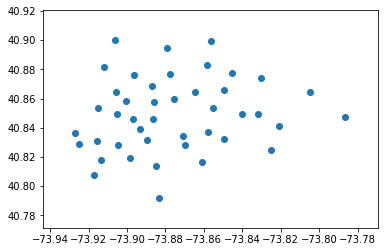

In [31]:
plt.scatter(df_bronx['LONG'],df_bronx['LAT'])

In [32]:
list_idx=df_bronx['LocationID']
list_idx=np.array(list_idx)

list_try=[]
for i in range(0, len(list_idx)):
    a=len(df[(((df.hour)== 7)|((df.hour)== 8)|((df.hour)== 9) )&((df.PULocationID)==list_idx[i])])
    list_try.append(a)

In [34]:
len(list_idx)

43

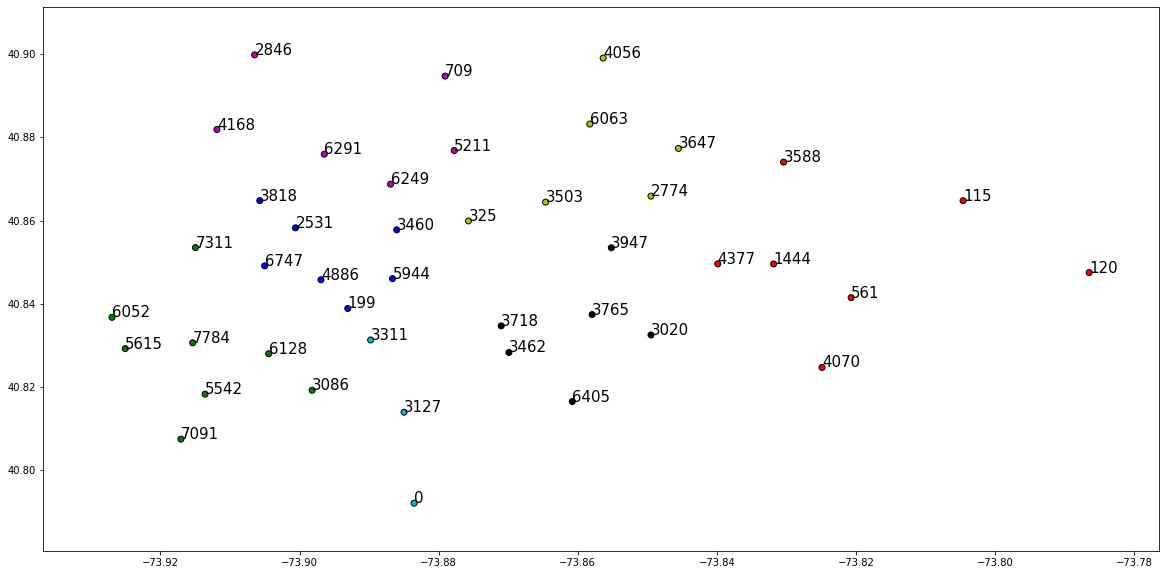

In [33]:
spectral_model_= SpectralClustering(n_clusters =7,affinity='nearest_neighbors',assign_labels='discretize',n_neighbors=10) 
labels_nn = spectral_model_.fit_predict(df_lat_long_123) 
x=df_lat_long_123['LONG'].values
y=df_lat_long_123['LAT'].values
fig, ax = plt.subplots(figsize=(20,10))
colmap={1:'r', 2:'g', 3:'b', 4:'k', 5:'m',6:'y',7:'c',8:'thistle', 9:'chocolate',10:'pink',11:'steelblue',12:'gray',13:'olive',14:'silver',15:'rosybrown',16:'salmon',17:'lawngreen',18:'khaki',19:'darkseagreen',20:'aqua'}
colors=map(lambda x: colmap[x+1], labels_nn)
colors1=list(colors)
ax.scatter(x,y, color= colors1, edgecolor='k')

for i, txt in enumerate(list_try):
    ax.annotate(txt, (x[i], y[i]),fontsize=15)

In [34]:
labels_1=labels_nn
df_lat_long_labels=df_lat_long_123
df_lat_long_labels['labels_1']=labels_1
df_lat_long_labels['zone_num']=list_idx
df_lat_long_labels['pick_up_time']=list_try

In [37]:
def printpuzoning (zzz):
    
    
    zoning = ["bronx_1",'bronx_2',"bronx_3",'bronx_4',"bronx_5",'bronx_6',"bronx_7"]
    #zoning = ["brooklyn_1","brooklyn_2","brooklyn_3","brooklyn_4","brooklyn_5", "queens_1","queens_2","queens_3","queens_4","brooklyn_1","brooklyn_2","brooklyn_3","brooklyn_4","brooklyn_5", "queens_1","queens_2","queens_3","queens_4", "brooklyn_1","brooklyn_2","brooklyn_3","brooklyn_4","brooklyn_5", "queens_1","queens_2","queens_3","queens_4","brooklyn_1","brooklyn_2","brooklyn_3","brooklyn_4","brooklyn_5", "queens_1","queens_2","queens_3","queens_4"]
    #list_no = ["2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40"]
    #character = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z","aa","ab", "ac","ad","ae","af" , "ag" ,"ah" ,"ai" ,"aj", "ak" ]
    for zzz in range (0 , (len(zoning))):
    
        print (zoning[zzz]+f'=df_lat_long_labels[df_lat_long_labels.labels_1=={zzz}]'+ '\n')
        print(zoning[zzz]+f'={zoning[zzz]}[\'zone_num\'].values'+ '\n')

printpuzoning(0)

bronx_1=df_lat_long_labels[df_lat_long_labels.labels_1==0]

bronx_1=bronx_1['zone_num'].values

bronx_2=df_lat_long_labels[df_lat_long_labels.labels_1==1]

bronx_2=bronx_2['zone_num'].values

bronx_3=df_lat_long_labels[df_lat_long_labels.labels_1==2]

bronx_3=bronx_3['zone_num'].values

bronx_4=df_lat_long_labels[df_lat_long_labels.labels_1==3]

bronx_4=bronx_4['zone_num'].values

bronx_5=df_lat_long_labels[df_lat_long_labels.labels_1==4]

bronx_5=bronx_5['zone_num'].values

bronx_6=df_lat_long_labels[df_lat_long_labels.labels_1==5]

bronx_6=bronx_6['zone_num'].values

bronx_7=df_lat_long_labels[df_lat_long_labels.labels_1==6]

bronx_7=bronx_7['zone_num'].values



In [35]:
bronx_1=df_lat_long_labels[df_lat_long_labels.labels_1==0]

bronx_1=bronx_1['zone_num'].values

bronx_2=df_lat_long_labels[df_lat_long_labels.labels_1==1]

bronx_2=bronx_2['zone_num'].values

bronx_3=df_lat_long_labels[df_lat_long_labels.labels_1==2]

bronx_3=bronx_3['zone_num'].values

bronx_4=df_lat_long_labels[df_lat_long_labels.labels_1==3]

bronx_4=bronx_4['zone_num'].values

bronx_5=df_lat_long_labels[df_lat_long_labels.labels_1==4]

bronx_5=bronx_5['zone_num'].values

bronx_6=df_lat_long_labels[df_lat_long_labels.labels_1==5]

bronx_6=bronx_6['zone_num'].values

bronx_7=df_lat_long_labels[df_lat_long_labels.labels_1==6]

bronx_7=bronx_7['zone_num'].values

In [83]:
bronx_7

array([ 60, 126, 199], dtype=int64)

In [36]:
unknown=[264,265,5,6,23,44,84,99,109,110,115,118,156,172,176,187,204,206,214,221,245,251,1]

In [37]:
list_brooklyn_1= [] 

for i in range(0, len(brooklyn_1)):

	 list_brooklyn_1.append(df[(df.PULocationID==brooklyn_1[i])]) 

list_2=[]
for i in range(0, len(list_brooklyn_1)): 

	 list_2.append(list_brooklyn_1[i])
a=pd.concat(list_2) 

a['zone']='brooklyn_1'
list_brooklyn_2= [] 

for i in range(0, len(brooklyn_2)):

	 list_brooklyn_2.append(df[(df.PULocationID==brooklyn_2[i])]) 

list_3=[]
for i in range(0, len(list_brooklyn_2)): 

	 list_3.append(list_brooklyn_2[i])
b=pd.concat(list_3) 

b['zone']='brooklyn_2'
list_brooklyn_3= [] 

for i in range(0, len(brooklyn_3)):

	 list_brooklyn_3.append(df[(df.PULocationID==brooklyn_3[i])]) 

list_4=[]
for i in range(0, len(list_brooklyn_3)): 

	 list_4.append(list_brooklyn_3[i])
c=pd.concat(list_4) 

c['zone']='brooklyn_3'
list_brooklyn_4= [] 

for i in range(0, len(brooklyn_4)):

	 list_brooklyn_4.append(df[(df.PULocationID==brooklyn_4[i])]) 

list_5=[]
for i in range(0, len(list_brooklyn_4)): 

	 list_5.append(list_brooklyn_4[i])
d=pd.concat(list_5) 

d['zone']='brooklyn_4'
list_brooklyn_5= [] 

for i in range(0, len(brooklyn_5)):

	 list_brooklyn_5.append(df[(df.PULocationID==brooklyn_5[i])]) 

list_6=[]
for i in range(0, len(list_brooklyn_5)): 

	 list_6.append(list_brooklyn_5[i])
e=pd.concat(list_6) 

e['zone']='brooklyn_5'
list_queens_1= [] 

for i in range(0, len(queens_1)):

	 list_queens_1.append(df[(df.PULocationID==queens_1[i])]) 

list_7=[]
for i in range(0, len(list_queens_1)): 

	 list_7.append(list_queens_1[i])
f=pd.concat(list_7) 

f['zone']='queens_1'
list_queens_2= [] 

for i in range(0, len(queens_2)):

	 list_queens_2.append(df[(df.PULocationID==queens_2[i])]) 

list_8=[]
for i in range(0, len(list_queens_2)): 

	 list_8.append(list_queens_2[i])
g=pd.concat(list_8) 

g['zone']='queens_2'
list_queens_3= [] 

for i in range(0, len(queens_3)):

	 list_queens_3.append(df[(df.PULocationID==queens_3[i])]) 

list_9=[]
for i in range(0, len(list_queens_3)): 

	 list_9.append(list_queens_3[i])
h=pd.concat(list_9) 

h['zone']='queens_3'
list_queens_4= [] 

for i in range(0, len(queens_4)):

	 list_queens_4.append(df[(df.PULocationID==queens_4[i])]) 

list_10=[]
for i in range(0, len(list_queens_4)): 

	 list_10.append(list_queens_4[i])
i1=pd.concat(list_10) 

i1['zone']='queens_4'
list_queens_5= [] 

for i in range(0, len(queens_5)):

	 list_queens_5.append(df[(df.PULocationID==queens_5[i])]) 

list_11=[]
for i in range(0, len(list_queens_5)): 

	 list_11.append(list_queens_5[i])
j=pd.concat(list_11) 

j['zone']='queens_5'
list_queens_6= [] 

for i in range(0, len(queens_6)):

	 list_queens_6.append(df[(df.PULocationID==queens_6[i])]) 

list_12=[]
for i in range(0, len(list_queens_6)): 

	 list_12.append(list_queens_6[i])
k=pd.concat(list_12) 

k['zone']='queens_6'
list_queens_7= [] 

for i in range(0, len(queens_7)):

	 list_queens_7.append(df[(df.PULocationID==queens_7[i])]) 

list_13=[]
for i in range(0, len(list_queens_7)): 

	 list_13.append(list_queens_7[i])
l=pd.concat(list_13) 

l['zone']='queens_7'
list_queens_8= [] 

for i in range(0, len(queens_8)):

	 list_queens_8.append(df[(df.PULocationID==queens_8[i])]) 

list_14=[]
for i in range(0, len(list_queens_8)): 

	 list_14.append(list_queens_8[i])
m=pd.concat(list_14) 

m['zone']='queens_8'
list_queens_9= [] 

for i in range(0, len(queens_9)):

	 list_queens_9.append(df[(df.PULocationID==queens_9[i])]) 

list_15=[]
for i in range(0, len(list_queens_9)): 

	 list_15.append(list_queens_9[i])
n=pd.concat(list_15) 

n['zone']='queens_9'
list_queens_10= [] 

for i in range(0, len(queens_10)):

	 list_queens_10.append(df[(df.PULocationID==queens_10[i])]) 

list_16=[]
for i in range(0, len(list_queens_10)): 

	 list_16.append(list_queens_10[i])
o=pd.concat(list_16) 

o['zone']='queens_10'
list_queens_11= [] 

for i in range(0, len(queens_11)):

	 list_queens_11.append(df[(df.PULocationID==queens_11[i])]) 

list_17=[]
for i in range(0, len(list_queens_11)): 

	 list_17.append(list_queens_11[i])
p=pd.concat(list_17) 

p['zone']='queens_11'
list_queens_12= [] 

for i in range(0, len(queens_12)):

	 list_queens_12.append(df[(df.PULocationID==queens_12[i])]) 

list_18=[]
for i in range(0, len(list_queens_12)): 

	 list_18.append(list_queens_12[i])
q=pd.concat(list_18) 

q['zone']='queens_12'
list_manhattan_1= [] 

for i in range(0, len(manhattan_1)):

	 list_manhattan_1.append(df[(df.PULocationID==manhattan_1[i])]) 

list_19=[]
for i in range(0, len(list_manhattan_1)): 

	 list_19.append(list_manhattan_1[i])
r=pd.concat(list_19) 

r['zone']='manhattan_1'
list_manhattan_2= [] 

for i in range(0, len(manhattan_2)):

	 list_manhattan_2.append(df[(df.PULocationID==manhattan_2[i])]) 

list_20=[]
for i in range(0, len(list_manhattan_2)): 

	 list_20.append(list_manhattan_2[i])
s=pd.concat(list_20) 

s['zone']='manhattan_2'
list_manhattan_3= [] 

for i in range(0, len(manhattan_3)):

	 list_manhattan_3.append(df[(df.PULocationID==manhattan_3[i])]) 

list_21=[]
for i in range(0, len(list_manhattan_3)): 

	 list_21.append(list_manhattan_3[i])
t=pd.concat(list_21) 

t['zone']='manhattan_3'
list_manhattan_4= [] 

for i in range(0, len(manhattan_4)):

	 list_manhattan_4.append(df[(df.PULocationID==manhattan_4[i])]) 

list_22=[]
for i in range(0, len(list_manhattan_4)): 

	 list_22.append(list_manhattan_4[i])
u=pd.concat(list_22) 

u['zone']='manhattan_4'
list_manhattan_5= [] 

for i in range(0, len(manhattan_5)):

	 list_manhattan_5.append(df[(df.PULocationID==manhattan_5[i])]) 

list_23=[]
for i in range(0, len(list_manhattan_5)): 

	 list_23.append(list_manhattan_5[i])
v=pd.concat(list_23) 

v['zone']='manhattan_5'
list_manhattan_6= [] 

for i in range(0, len(manhattan_6)):

	 list_manhattan_6.append(df[(df.PULocationID==manhattan_6[i])]) 

list_24=[]
for i in range(0, len(list_manhattan_6)): 

	 list_24.append(list_manhattan_6[i])
w=pd.concat(list_24) 

w['zone']='manhattan_6'
list_manhattan_7= [] 

for i in range(0, len(manhattan_7)):

	 list_manhattan_7.append(df[(df.PULocationID==manhattan_7[i])]) 

list_25=[]
for i in range(0, len(list_manhattan_7)): 

	 list_25.append(list_manhattan_7[i])
x=pd.concat(list_25) 

x['zone']='manhattan_7'
list_manhattan_8= [] 

for i in range(0, len(manhattan_8)):

	 list_manhattan_8.append(df[(df.PULocationID==manhattan_8[i])]) 

list_26=[]
for i in range(0, len(list_manhattan_8)): 

	 list_26.append(list_manhattan_8[i])
y=pd.concat(list_26) 

y['zone']='manhattan_8'
list_bronx_1= [] 

for i in range(0, len(bronx_1)):

	 list_bronx_1.append(df[(df.PULocationID==bronx_1[i])]) 

list_27=[]
for i in range(0, len(list_bronx_1)): 

	 list_27.append(list_bronx_1[i])
z=pd.concat(list_27) 

z['zone']='bronx_1'
list_bronx_2= [] 

for i in range(0, len(bronx_2)):

	 list_bronx_2.append(df[(df.PULocationID==bronx_2[i])]) 

list_28=[]
for i in range(0, len(list_bronx_2)): 

	 list_28.append(list_bronx_2[i])
aa=pd.concat(list_28) 

aa['zone']='bronx_2'
list_bronx_3= [] 

for i in range(0, len(bronx_3)):

	 list_bronx_3.append(df[(df.PULocationID==bronx_3[i])]) 

list_29=[]
for i in range(0, len(list_bronx_3)): 

	 list_29.append(list_bronx_3[i])
ab=pd.concat(list_29) 

ab['zone']='bronx_3'
list_bronx_4= [] 

for i in range(0, len(bronx_4)):

	 list_bronx_4.append(df[(df.PULocationID==bronx_4[i])]) 

list_30=[]
for i in range(0, len(list_bronx_4)): 

	 list_30.append(list_bronx_4[i])
ac=pd.concat(list_30) 

ac['zone']='bronx_4'
list_bronx_5= [] 

for i in range(0, len(bronx_5)):

	 list_bronx_5.append(df[(df.PULocationID==bronx_5[i])]) 

list_31=[]
for i in range(0, len(list_bronx_5)): 

	 list_31.append(list_bronx_5[i])
ad=pd.concat(list_31) 

ad['zone']='bronx_5'
list_bronx_6= [] 

for i in range(0, len(bronx_6)):

	 list_bronx_6.append(df[(df.PULocationID==bronx_6[i])]) 

list_32=[]
for i in range(0, len(list_bronx_6)): 

	 list_32.append(list_bronx_6[i])
ae=pd.concat(list_32) 

ae['zone']='bronx_6'
list_bronx_7= [] 

for i in range(0, len(bronx_7)):

	 list_bronx_7.append(df[(df.PULocationID==bronx_7[i])]) 

list_33=[]
for i in range(0, len(list_bronx_7)): 

	 list_33.append(list_bronx_7[i])
af=pd.concat(list_33) 

af['zone']='bronx_7'

list_unknown= [] 

for i in range(0, len(unknown)):

	 list_unknown.append(df[(df.PULocationID==unknown[i])]) 

list_34=[]
for i in range(0, len(list_unknown)): 

	 list_34.append(list_unknown[i])
ag=pd.concat(list_34) 

ag['zone']='unknown'
all_area=pd.concat([a,b,c,d,e,f,g,h,i1,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,aa,ab,ac,ad,ae,af,ag])

In [38]:
all_area

,Unnamed: 0,hvfhs_license_num,dispatching_base_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,SR_Flag,hour,zone
373,373,HV0003,B02866,2019-02-01 00:44:19,2019-02-01 00:48:28,14,227,NaN,0,brooklyn_1
906,906,HV0003,B02764,2019-02-01 00:16:04,2019-02-01 00:28:25,14,228,NaN,0,brooklyn_1
920,920,HV0003,B02882,2019-02-01 00:16:23,2019-02-01 00:42:56,14,258,NaN,0,brooklyn_1
1522,1522,HV0003,B02869,2019-02-01 00:14:57,2019-02-01 00:21:35,14,67,NaN,0,brooklyn_1
2145,2145,HV0003,B02764,2019-02-01 00:59:22,2019-02-01 01:06:45,14,14,NaN,0,brooklyn_1
2674,2674,HV0005,B02510,2019-02-01 00:22:29,2019-02-01 00:29:25,14,67,NaN,0,brooklyn_1
2922,2922,HV0003,B02875,2019-02-01 00:22:40,2019-02-01 00:33:29,14,22,NaN,0,brooklyn_1
3145,3145,HV0003,B02871,2019-02-01 00:19:09,2019-02-01 00:26:05,14,14,NaN,0,brooklyn_1
3228,3228,HV0003,B02866,2019-02-01 00:45:37,2019-02-01 00:50:23,14,14,NaN,0,brooklyn_1
3229,3229,HV0003,B02866,2019-02-01 00:57:26,2019-02-01 00:59:02,14,14,NaN,0,brooklyn_1


In [39]:
dropbrooklyn_1=[]
for i in range(0, len(brooklyn_1)):
	dropbrooklyn_1.append(all_area[(all_area.DOLocationID==brooklyn_1[i])])
list_2=[]
for i in range(0, len(dropbrooklyn_1)):
	list_2.append(dropbrooklyn_1[i])
aa=pd.concat(list_2)
aa['zone_drop']='brooklyn_1'
dropbrooklyn_2=[]
for i in range(0, len(brooklyn_2)):
	dropbrooklyn_2.append(all_area[(all_area.DOLocationID==brooklyn_2[i])])
list_3=[]
for i in range(0, len(dropbrooklyn_2)):
	list_3.append(dropbrooklyn_2[i])
bb=pd.concat(list_3)
bb['zone_drop']='brooklyn_2'
dropbrooklyn_3=[]
for i in range(0, len(brooklyn_3)):
	dropbrooklyn_3.append(all_area[(all_area.DOLocationID==brooklyn_3[i])])
list_4=[]
for i in range(0, len(dropbrooklyn_3)):
	list_4.append(dropbrooklyn_3[i])
cc=pd.concat(list_4)
cc['zone_drop']='brooklyn_3'
dropbrooklyn_4=[]
for i in range(0, len(brooklyn_4)):
	dropbrooklyn_4.append(all_area[(all_area.DOLocationID==brooklyn_4[i])])
list_5=[]
for i in range(0, len(dropbrooklyn_4)):
	list_5.append(dropbrooklyn_4[i])
dd=pd.concat(list_5)
dd['zone_drop']='brooklyn_4'
dropbrooklyn_5=[]
for i in range(0, len(brooklyn_5)):
	dropbrooklyn_5.append(all_area[(all_area.DOLocationID==brooklyn_5[i])])
list_6=[]
for i in range(0, len(dropbrooklyn_5)):
	list_6.append(dropbrooklyn_5[i])
ee=pd.concat(list_6)
ee['zone_drop']='brooklyn_5'
dropqueens_1=[]
for i in range(0, len(queens_1)):
	dropqueens_1.append(all_area[(all_area.DOLocationID==queens_1[i])])
list_7=[]
for i in range(0, len(dropqueens_1)):
	list_7.append(dropqueens_1[i])
ff=pd.concat(list_7)
ff['zone_drop']='queens_1'
dropqueens_2=[]
for i in range(0, len(queens_2)):
	dropqueens_2.append(all_area[(all_area.DOLocationID==queens_2[i])])
list_8=[]
for i in range(0, len(dropqueens_2)):
	list_8.append(dropqueens_2[i])
gg=pd.concat(list_8)
gg['zone_drop']='queens_2'
dropqueens_3=[]
for i in range(0, len(queens_3)):
	dropqueens_3.append(all_area[(all_area.DOLocationID==queens_3[i])])
list_9=[]
for i in range(0, len(dropqueens_3)):
	list_9.append(dropqueens_3[i])
hh=pd.concat(list_9)
hh['zone_drop']='queens_3'
dropqueens_4=[]
for i in range(0, len(queens_4)):
	dropqueens_4.append(all_area[(all_area.DOLocationID==queens_4[i])])
list_10=[]
for i in range(0, len(dropqueens_4)):
	list_10.append(dropqueens_4[i])
i1i1=pd.concat(list_10)
i1i1['zone_drop']='queens_4'
dropqueens_5=[]
for i in range(0, len(queens_5)):
	dropqueens_5.append(all_area[(all_area.DOLocationID==queens_5[i])])
list_11=[]
for i in range(0, len(dropqueens_5)):
	list_11.append(dropqueens_5[i])
jj=pd.concat(list_11)
jj['zone_drop']='queens_5'
dropqueens_6=[]
for i in range(0, len(queens_6)):
	dropqueens_6.append(all_area[(all_area.DOLocationID==queens_6[i])])
list_12=[]
for i in range(0, len(dropqueens_6)):
	list_12.append(dropqueens_6[i])
kk=pd.concat(list_12)
kk['zone_drop']='queens_6'
dropqueens_7=[]
for i in range(0, len(queens_7)):
	dropqueens_7.append(all_area[(all_area.DOLocationID==queens_7[i])])
list_13=[]
for i in range(0, len(dropqueens_7)):
	list_13.append(dropqueens_7[i])
ll=pd.concat(list_13)
ll['zone_drop']='queens_7'
dropqueens_8=[]
for i in range(0, len(queens_8)):
	dropqueens_8.append(all_area[(all_area.DOLocationID==queens_8[i])])
list_14=[]
for i in range(0, len(dropqueens_8)):
	list_14.append(dropqueens_8[i])
mm=pd.concat(list_14)
mm['zone_drop']='queens_8'
dropqueens_9=[]
for i in range(0, len(queens_9)):
	dropqueens_9.append(all_area[(all_area.DOLocationID==queens_9[i])])
list_15=[]
for i in range(0, len(dropqueens_9)):
	list_15.append(dropqueens_9[i])
nn=pd.concat(list_15)
nn['zone_drop']='queens_9'
dropqueens_10=[]
for i in range(0, len(queens_10)):
	dropqueens_10.append(all_area[(all_area.DOLocationID==queens_10[i])])
list_16=[]
for i in range(0, len(dropqueens_10)):
	list_16.append(dropqueens_10[i])
oo=pd.concat(list_16)
oo['zone_drop']='queens_10'
dropqueens_11=[]
for i in range(0, len(queens_11)):
	dropqueens_11.append(all_area[(all_area.DOLocationID==queens_11[i])])
list_17=[]
for i in range(0, len(dropqueens_11)):
	list_17.append(dropqueens_11[i])
pp=pd.concat(list_17)
pp['zone_drop']='queens_11'
dropqueens_12=[]
for i in range(0, len(queens_12)):
	dropqueens_12.append(all_area[(all_area.DOLocationID==queens_12[i])])
list_18=[]
for i in range(0, len(dropqueens_12)):
	list_18.append(dropqueens_12[i])
qq=pd.concat(list_18)
qq['zone_drop']='queens_12'
dropmanhattan_1=[]
for i in range(0, len(manhattan_1)):
	dropmanhattan_1.append(all_area[(all_area.DOLocationID==manhattan_1[i])])
list_19=[]
for i in range(0, len(dropmanhattan_1)):
	list_19.append(dropmanhattan_1[i])
rr=pd.concat(list_19)
rr['zone_drop']='manhattan_1'
dropmanhattan_2=[]
for i in range(0, len(manhattan_2)):
	dropmanhattan_2.append(all_area[(all_area.DOLocationID==manhattan_2[i])])
list_20=[]
for i in range(0, len(dropmanhattan_2)):
	list_20.append(dropmanhattan_2[i])
ss=pd.concat(list_20)
ss['zone_drop']='manhattan_2'
dropmanhattan_3=[]
for i in range(0, len(manhattan_3)):
	dropmanhattan_3.append(all_area[(all_area.DOLocationID==manhattan_3[i])])
list_21=[]
for i in range(0, len(dropmanhattan_3)):
	list_21.append(dropmanhattan_3[i])
tt=pd.concat(list_21)
tt['zone_drop']='manhattan_3'
dropmanhattan_4=[]
for i in range(0, len(manhattan_4)):
	dropmanhattan_4.append(all_area[(all_area.DOLocationID==manhattan_4[i])])
list_22=[]
for i in range(0, len(dropmanhattan_4)):
	list_22.append(dropmanhattan_4[i])
uu=pd.concat(list_22)
uu['zone_drop']='manhattan_4'
dropmanhattan_5=[]
for i in range(0, len(manhattan_5)):
	dropmanhattan_5.append(all_area[(all_area.DOLocationID==manhattan_5[i])])
list_23=[]
for i in range(0, len(dropmanhattan_5)):
	list_23.append(dropmanhattan_5[i])
vv=pd.concat(list_23)
vv['zone_drop']='manhattan_5'
dropmanhattan_6=[]
for i in range(0, len(manhattan_6)):
	dropmanhattan_6.append(all_area[(all_area.DOLocationID==manhattan_6[i])])
list_24=[]
for i in range(0, len(dropmanhattan_6)):
	list_24.append(dropmanhattan_6[i])
ww=pd.concat(list_24)
ww['zone_drop']='manhattan_6'
dropmanhattan_7=[]
for i in range(0, len(manhattan_7)):
	dropmanhattan_7.append(all_area[(all_area.DOLocationID==manhattan_7[i])])
list_25=[]
for i in range(0, len(dropmanhattan_7)):
	list_25.append(dropmanhattan_7[i])
xx=pd.concat(list_25)
xx['zone_drop']='manhattan_7'
dropmanhattan_8=[]
for i in range(0, len(manhattan_8)):
	dropmanhattan_8.append(all_area[(all_area.DOLocationID==manhattan_8[i])])
list_26=[]
for i in range(0, len(dropmanhattan_8)):
	list_26.append(dropmanhattan_8[i])
yy=pd.concat(list_26)
yy['zone_drop']='manhattan_8'
dropbronx_1=[]
for i in range(0, len(bronx_1)):
	dropbronx_1.append(all_area[(all_area.DOLocationID==bronx_1[i])])
list_27=[]
for i in range(0, len(dropbronx_1)):
	list_27.append(dropbronx_1[i])
zz=pd.concat(list_27)
zz['zone_drop']='bronx_1'
dropbronx_2=[]
for i in range(0, len(bronx_2)):
	dropbronx_2.append(all_area[(all_area.DOLocationID==bronx_2[i])])
list_28=[]
for i in range(0, len(dropbronx_2)):
	list_28.append(dropbronx_2[i])
aaaa=pd.concat(list_28)
aaaa['zone_drop']='bronx_2'
dropbronx_3=[]
for i in range(0, len(bronx_3)):
	dropbronx_3.append(all_area[(all_area.DOLocationID==bronx_3[i])])
list_29=[]
for i in range(0, len(dropbronx_3)):
	list_29.append(dropbronx_3[i])
abab=pd.concat(list_29)
abab['zone_drop']='bronx_3'
dropbronx_4=[]
for i in range(0, len(bronx_4)):
	dropbronx_4.append(all_area[(all_area.DOLocationID==bronx_4[i])])
list_30=[]
for i in range(0, len(dropbronx_4)):
	list_30.append(dropbronx_4[i])
acac=pd.concat(list_30)
acac['zone_drop']='bronx_4'
dropbronx_5=[]
for i in range(0, len(bronx_5)):
	dropbronx_5.append(all_area[(all_area.DOLocationID==bronx_5[i])])
list_31=[]
for i in range(0, len(dropbronx_5)):
	list_31.append(dropbronx_5[i])
adad=pd.concat(list_31)
adad['zone_drop']='bronx_5'
dropbronx_6=[]
for i in range(0, len(bronx_6)):
	dropbronx_6.append(all_area[(all_area.DOLocationID==bronx_6[i])])
list_32=[]
for i in range(0, len(dropbronx_6)):
	list_32.append(dropbronx_6[i])
aeae=pd.concat(list_32)
aeae['zone_drop']='bronx_6'
dropbronx_7=[]
for i in range(0, len(bronx_7)):
	dropbronx_7.append(all_area[(all_area.DOLocationID==bronx_7[i])])
list_33=[]
for i in range(0, len(dropbronx_7)):
	list_33.append(dropbronx_7[i])
afaf=pd.concat(list_33)
afaf['zone_drop']='bronx_7'

dropunknown=[]
for i in range(0, len(unknown)):
	dropunknown.append(all_area[(all_area.DOLocationID==unknown[i])])
list_34=[]
for i in range(0, len(dropunknown)):
	list_34.append(dropunknown[i])
agag=pd.concat(list_34)
agag['zone_drop']='unknown'
all_1=pd.concat([aa,bb,cc,dd,ee,ff,gg,hh,i1i1,jj,kk,ll,mm,nn,oo,pp,qq,rr,ss,tt,uu,vv,ww,xx,yy,zz,aaaa,abab,acac,adad,aeae,afaf,agag])

In [ ]:
all1.to_csv('all2.csv')